In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the dataset into dataframe
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
# join the train and test dataset for accessing and cleaning
df = pd.concat([train, test], ignore_index = True)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# check the summary of the datarame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [18]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Title            0
dtype: int64

In [19]:
# check for duplicate values
df.duplicated().sum()

0

## DATA CLEANING

In [20]:
df.dropna(subset=["Embarked"], inplace=True)
df["Cabin"].fillna("Unknown", inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [21]:
# extract passengers title from their name
title_split = lambda x: x.split()[1].strip(".")

In [22]:
# new column
df["Title"] = df["Name"].apply(title_split)


In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.842596,0,0,A.5. 3236,8.0500,Unknown,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,y
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.842596,0,0,359309,8.0500,Unknown,S,Mr


In [36]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Title            0
dtype: int64

## EXPLORATORY DATA ANALYSIS (EDA)

In [25]:
class_count = df.Pclass.value_counts()
class_count.index = ["third class", "frist class", "second class"]
class_count

third class     709
frist class     321
second class    277
Name: Pclass, dtype: int64

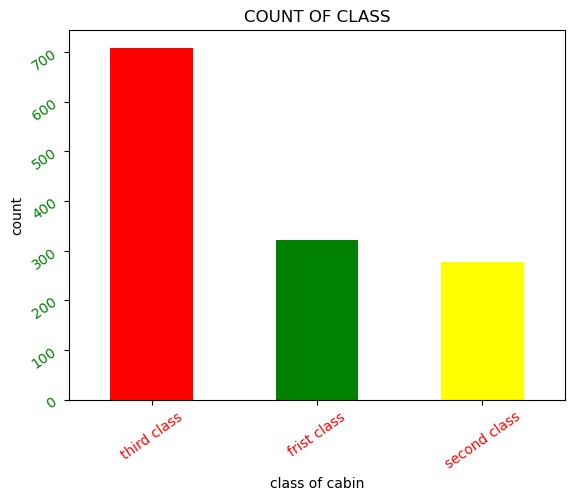

In [27]:
class_count.plot(kind="bar", color=["red", "green", "yellow"])
plt.title("COUNT OF CLASS")
plt.xlabel("class of cabin")
plt.ylabel("count")
plt.xticks(rotation =35, color ="red")
plt.yticks(rotation = 35, color ="green")
plt.show()

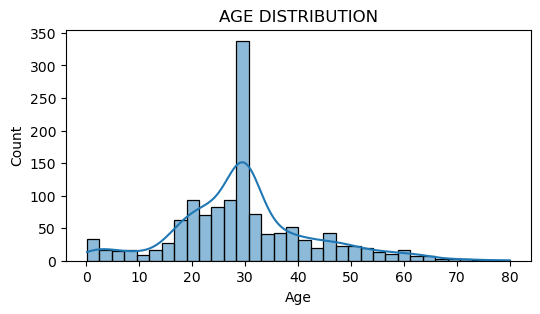

In [30]:
plt.figure(figsize=(6, 3))
sns.histplot(d["Age"], kde=True)
plt.title("AGE DISTRIBUTION")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [32]:
def barplot(col):
    dead = df.query("Survived == 0")[col].value_counts()
    alive = df.query("Survived ==1")[col].value_counts()
    i =pd.concat([dead,alive], axis =1, keys=["dead", "alive"])
    i.plot(kind="bar")
    plt.title(f"count of [col]")
    plt.xlabel(f"{col}")
    plt.ylabel("count")
    plt.xticks(rotation =35, color ="red")
    plt.yticks(rotation = 35, color ="green")
    plt.show()

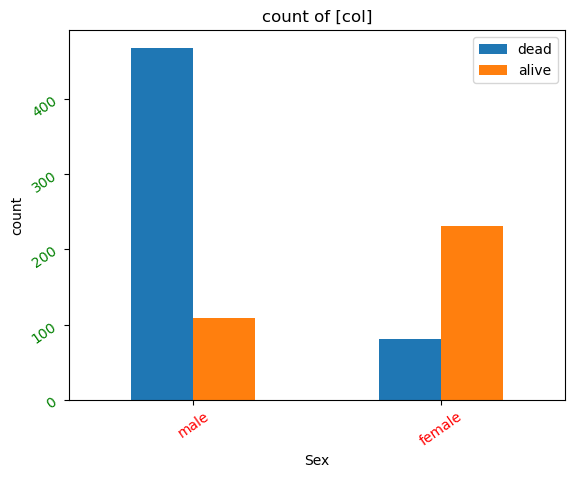

In [33]:
barplot("Sex")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

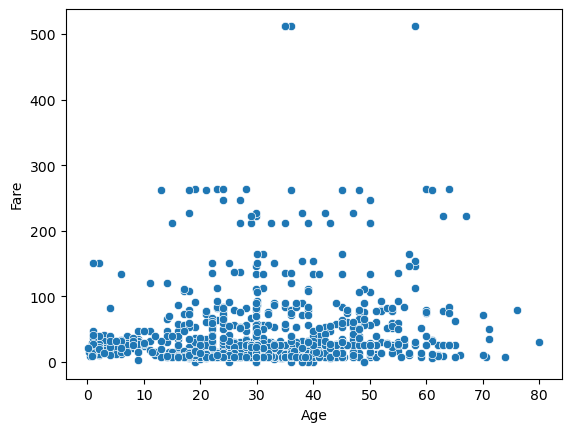

In [34]:
sns.scatterplot(data=df, x="Age", y="Fare")